## Don't panic!

### Levels of measurement
https://en.wikipedia.org/wiki/Level_of_measurement

- Nominal
- Ordinal
- Interval
- Ratio

Why break variables down like this? If we consider the logical construct of each type, we can then determine appropriate uses for each. Consider height of a person. It is often said that height is normally distributed. A 'normal' distribution being a continuous function describing the likelihood of a given measure. Along the measure, there can be any value. Meaning that if a person's height was truly represented by a Gaussian (Gauss first described the 'normal' distribution), then someone in the current population of 3 billion people would be 3 meters tall... Often the measures and the distributions that we assume govern them are 'close enough'.

Nominal is a measure where we can only count the number of occurances of the "thing". So the number of times that the letters "a" & "b" have been used in the prior paragraph could be described by ${"a": 37, "b": 13}$.

Ordinal is where there is some meaning in the order, but not the value itself. Here we could think of 'happiness' as described on a scale. A zero may mean very happy, a three neutral, and a five very unhappy. This is deliberately opposite to the common description, but there is no less 'meaning' in the values themselves. However the order matters, so a very happy value of zero, a very unhappy of one, and a neutral of five is capricious, arbitrary, and loses logical information.

Interval requires a meaningful separation between values, but there is no requirement for a zero value or a method of division. The examples here are a little more subtle. A time or a date falls into the interval measure. There is no zero time, except if we define our starting point as is the case for UNIX time. Similiary, there is no sense of division or multiplication. The mathematical differences are often glossed over if the results are sensible, but occasionally it may cause problems. Claiming that logistic regression is a predictive model may get you in trouble with a statistics journal.

Ratio measure requires that we can divide values and that there is a zero. So here we have mass, length, force, etc.

In [2]:
# import useful stuff
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

letters in the paragraph a: 37, b: 13


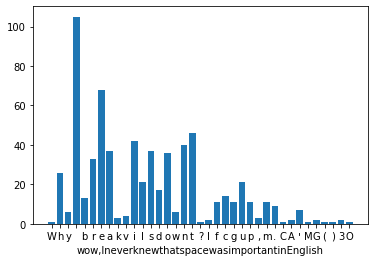

In [3]:
# So if we measure the letter occurance in the paragraph
para = "Why break variables down like this? If we consider the logical construct of each type, we can then determine appropriate uses for each. Consider height of a person. It is often said that height is normally distributed. A 'normal' distribution being a continuous function describing the likelihood of a given measure. Along the measure, there can be any value. Meaning that if a person's height was truly represented by a Gaussian (Gauss first described the 'normal' distribution), then someone in the current population of 3 billion people would be 3 meters tall... Often the measures and the distributions that we assume govern them are 'close enough'."
letter_counts = Counter(para)
print(f"letters in the paragraph a: {letter_counts['a']}, b: {letter_counts['b']}")
    
plt.bar(range(len(letter_counts)), letter_counts.values(), align='center')
plt.xticks(range(len(letter_counts)), list(letter_counts.keys()))
plt.xlabel("wow,IneverknewthatspacewasimportantinEnglish")
plt.show()

### Vectors and vector spaces
What is a vector? In US schools, the basic definition is that is is a 'quantity with magnitude and direction'. So we can describe things like velocity and momentum. It turns out that this a fairly strict interpretation, that quickly gets in the way. Rather than get into the pure math, some examples should surfice.

#### Vectors
So let's begin with the velocity example. Say that we have an airplane travelling from St. Louis to New Orleans in a straight line. Initially, during the climb it has a velocity of 150m/s horizontally and 15m/s vertically. So we can describe this as $[150, 15]$. Here we are assuming that horizontal is the first ordinate in the array and vertical is the second. Note that we are also assuming that positive is travelling from our origin to our destination in the horizontal and that opposing gravity (up) is positive. So here we have defined our vector/array by the position in the sequence and some external axes. So we could also use the notation, $x=150$, $y=15$.

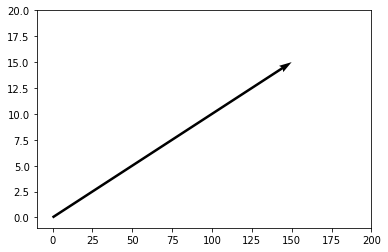

In [33]:
X, Y, U, V = 0, 0, 150, 15
plt.figure()
ax = plt.gca()
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-10, 200])
ax.set_ylim([-1, 20])
plt.draw()
plt.show()

Note that there is one more assumption that we took for granted. We assumed that the axes themselves were cartesian. The x/y axes are 90 degrees from one another. Im this representation, when you add to the x axis, there is zero effect on the y axis. They have no effect on the other, which--glossing over lots of important stuff--is called orthonormal or orthogonal.

There is no requirement to define the axes or the space in this manner. It would be just as valid to define one axis as running along the length of our airplane ($x_1=160.9$) and the other along the ground ($x_2=150$). This would mean that the two axes were no longer orthogonal. Thus, an increase in one would cause the other to change along with it.

This becomes relevant where we allow our vector-space to define the relationship between our vectors. Where we don't define our axes, there can be no assumption that they are orthogonal. Our only assumption is that each axis is consistently measured and that each one is different from one another. Which brings us to words.

### Vector representation of words and phrases
The collection of documents is named a corpus. The documents being vectors and the collection, the corpus, the vector-space. Each dimension or axis is often called a term, signifying that it encompasses both words and characters. The translational mapping between the words an their vector axis is called a dictionary. For the subsequent examples we can use the following dictionary and documents:

0 -> where
1 -> is
2 -> my
3 -> money
4 -> car
5 -> wallet

doc1 = "where is my money"
doc2 = "i keep my money in my wallet"
doc3 = "my car is where my money is"

In [31]:
dct = {"where": 0, "is": 1, "my": 2, "money":3, "car": 4, "wallet": 5}

doc1 = "where is my money"
doc2 = "i keep my money in my wallet"
doc3 = "my car is where my money is"

#### Word counts or bags of words
Here we represent each document as an array or a tuple. Matter doesn't order word. At least not in this representation. Remember that the model is measured by its usefulness.

In the case of an array we can assume the the position in the array represents the related word dimension. So doc1 could be represented as the array $[1, 1, 1, 1, 0, 0]$. There is one occurance of "where", so there is a corresponding value of unity at the zeroth position. There is one occurance of "is", so there is a value of unity at the first position of the array. Et cetera. 

Representing the document as a tuple, the format is similar to the second form of the vector, $x_1=150$, where the first position indicates the term axis and the second the count along that axis. Rather than wallet=1, a tuple for wallet would be given as (5, 1), since it is in the fifth position. So doc3 would be represented as $[(2, 2), (4, 1), (1, 2), (0, 1), (3, 1)]$, given that "is" and "my" occur twice. The benefit of this representation is that is a dense array. Meaning that terms without a count are not required in the description, thus negating the need for lots of zeroes. This is particularly useful where the dictionary may consist of 3000 to 100,000 terms.

Note that in the bag-of-words format, "money my is where" is identical to doc1.

In [34]:
doc2_array = [0, 0, 2, 1, 0, 1]

#### Position-occurance or one-hot
Unlike the bag-of-words representation, for one-hot order matters. Here, each term is represented by an array that represents that word in the word vector-space. So doc3 would be represented as an array which consisted of a vector of vectors (sounds fun right?) or as we get further down the rabbit hole, a tensor (of rank two).

This approach returns a dense array for every document which is costly to store and to manipulate. However, this appropriate when passing documents to a neural network where each term has a corresponding perceptron. Care need to be taken with when/where this representation is generated.

In [35]:
doc3_one_hot = [
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0],
]

### Exercise 01
There always has to be homework...

Parse the text Carmilla into a series of bag-of-words tuples. You will have to separate the corpus into a series of "documents". Do this dividing the corpus by sentence and then again by paragraph.

P.S. Carmilla is a wonderful book!

In [42]:
with open('carmilla.txt', 'r') as f:
    corpus = f.read()
    
print(corpus[:30])

CARMILLA

J. Sheridan LeFanu


